In [282]:
import numpy as np
from matplotlib import pyplot as plt
from Hammerstein import Hammerstein_Gen
from NadarayaWatson import NadarayaWatsonKernelReg

In [283]:
n=100
input_std=1
noise_std=0.1
nonlinear_fun = lambda x: np.arctan(5*x)
linear_fun = [1,-0.2]
U,Y = Hammerstein_Gen.Hammerstein(n,input_std, nonlinear_fun, linear_fun, noise_std)

The input-output pairs of signals are from a Hammerstein system with arctan nonlinear characteristics. The length of the data for estimating the model is n=100

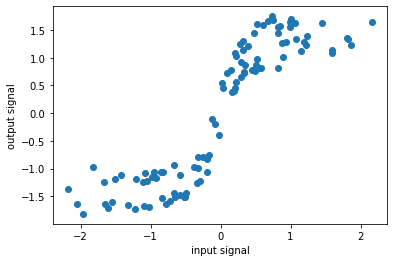

In [295]:
plt.scatter(U,Y)
plt.xlabel('input signal')
plt.ylabel('output signal')
plt.show()

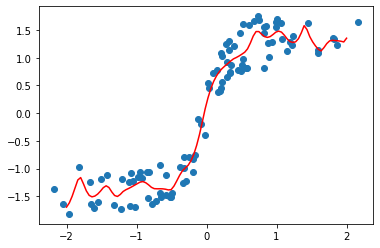

In [306]:
X = np.linspace(-2,2,100).reshape([-1,1])
h=0.2
Y_hat = []
#print(NadarayaWatsonKernelReg.KernelEst(UU[3],h,U,Y))
for i in range(len(X)):
    tp = NadarayaWatsonKernelReg.KernelEst(X[i],h,U,Y)
    Y_hat.append(tp)
Y_hat = np.array(Y_hat)
plt.scatter(U,Y)
plt.plot(X,Y_hat,color='red')
plt.show()

Although the nonparametric regression does not represent the model by any parameters, the final regression results are consist of the estimated values at different locations. These lines of code show the Nadraya-Watson kernel estimation result for using h=0.2 as the smoothing parameter, which corresponds to overfitting from the final plot.

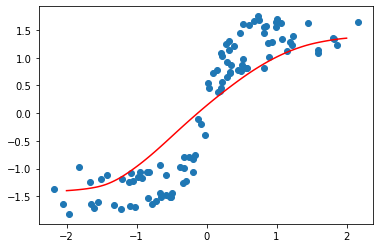

In [333]:
X = np.linspace(-2,2,100).reshape([-1,1])
h=1.8
Y_hat = []
#print(NadarayaWatsonKernelReg.KernelEst(UU[3],h,U,Y))
for i in range(len(X)):
    tp = NadarayaWatsonKernelReg.KernelEst(X[i],h,U,Y)
    Y_hat.append(tp)
Y_hat = np.array(Y_hat)
plt.scatter(U,Y)
plt.plot(X,Y_hat,color='red')
plt.show()

These lines of code show the Nadraya-Watson kernel estimation result for using h=1.8 as the smoothing parameter, which corresponds to underfitting from the final plot.

In order to find the optimal smoothing parameter h, we need to conduct a search on a grid of potential values of h. It is worth noting that the user should modify the beginning and end values of h if their interested model correspond to a different range or a different length of training data. (The more the training data, the smaller the size of h should be.) 

In [334]:
C = np.linspace(0,6,21)
H_grid = 1e-2*np.exp(C)
print(H_grid)

[0.01       0.01349859 0.01822119 0.02459603 0.03320117 0.04481689
 0.06049647 0.0816617  0.11023176 0.14879732 0.20085537 0.27112639
 0.36598234 0.49402449 0.66686331 0.90017131 1.21510418 1.64021907
 2.21406416 2.98867401 4.03428793]


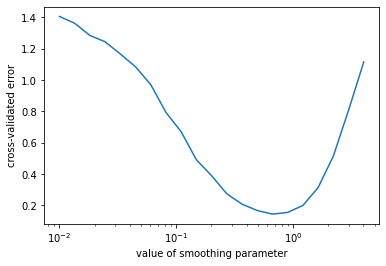

In [342]:
CV = 5 
## Use 5-fold cross-validation. The user can use a different number.
nCV = round(len(U)/CV)
GridErr = []
for i in range(len(C)):
    h = H_grid[i]
    CVErr = []
    for j in range(CV):
        U_train = U[j*nCV:(j+1)*nCV]
        Y_train = Y[j*nCV:(j+1)*nCV]
        index = range(j*nCV,(j+1)*nCV)
        U_test = np.delete(U,index,axis=0)
        Y_test = np.delete(Y,index,axis=0)
        CVErrK = []
        for k in range(len(U_test)):
            Y_test_hat = NadarayaWatsonKernelReg.KernelEst(U_test[k],h,U_train,Y_train)
            CVErrK.append((Y_test_hat-Y_test[k])**2)
        CVErr.append(np.array(CVErrK).mean())  
    GridErr.append(np.array(CVErr).mean()) 
plt.plot(H_grid,GridErr)
plt.xscale('log')
plt.xlabel('value of smoothing parameter')
plt.ylabel('cross-validated error')
plt.show()

In [345]:
h_star = H_grid[np.where(GridErr==np.min(GridErr))]
# The optimal smoothing parameter should be the one that corresponds to the minimum cross-caliatione error.
print(h_star)

[0.66686331]


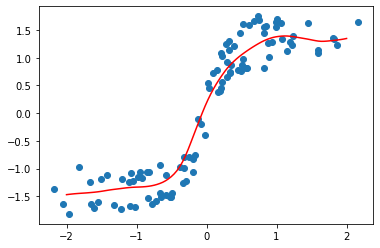

In [347]:
Y_hat = []
for i in range(len(X)):
    tp = NadarayaWatsonKernelReg.KernelEst(X[i],h_star,U,Y)
    Y_hat.append(tp)
Y_hat = np.array(Y_hat)
plt.scatter(U,Y)
plt.plot(X,Y_hat,color='red')
plt.show()

This is the final regression result with the smoothing bandwidth selected from a cross-valiation approach.